# Fish Weight Prediction

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv("fish.csv")
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
67,Parkki,170.0,19.0,20.7,23.2,9.3960,3.4104
114,Perch,700.0,34.5,37.0,39.4,10.8350,6.2646
124,Perch,1000.0,39.8,43.0,45.2,11.9328,7.2772
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
127,Perch,1000.0,41.1,44.0,46.6,12.4888,7.5958
51,Roach,180.0,23.6,25.2,27.9,7.0866,3.9060
12,Bream,500.0,29.1,31.5,36.4,13.7592,4.3680
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
10,Bream,475.0,28.4,31.0,36.2,14.2628,5.1042
92,Perch,150.0,20.5,22.5,24.0,6.7920,3.6240


In [3]:
df.shape

(159, 7)

In [4]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [5]:
df.drop_duplicates()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
df.tail(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [8]:
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [10]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [11]:
## Checking null values

df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

No null values present

In [12]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [13]:
df.value_counts('Weight')

Weight
300.0     6
700.0     5
120.0     5
500.0     5
1000.0    5
         ..
169.0     1
161.0     1
135.0     1
125.0     1
1650.0    1
Length: 101, dtype: int64

In [14]:
df.value_counts('Species')

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
dtype: int64

## EDA

## Replacing categorical column into numerical

In [15]:
df['Species'] = df['Species'].replace({'Bream':0, 'Parkki':1, 'Perch':2, 'Pike':3, 'Roach':4, 'Smelt':5, 'Whitefish':6})

In [16]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


array([[<AxesSubplot:title={'center':'Species'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Width'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

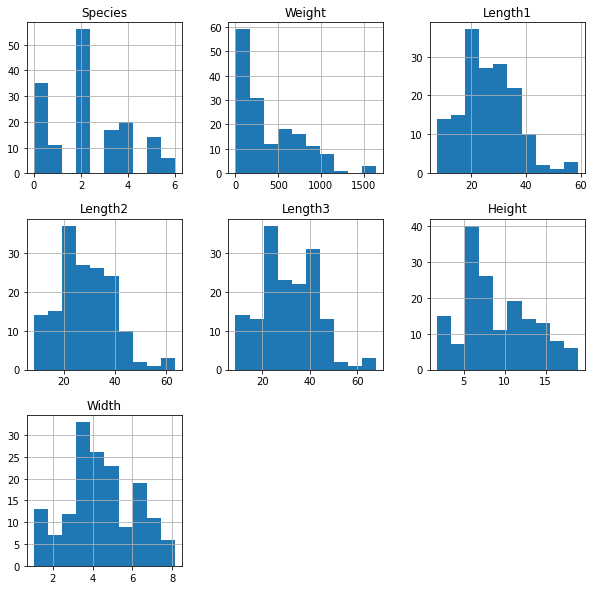

In [18]:
df.hist(figsize=(10,10))

<AxesSubplot:xlabel='Species', ylabel='count'>

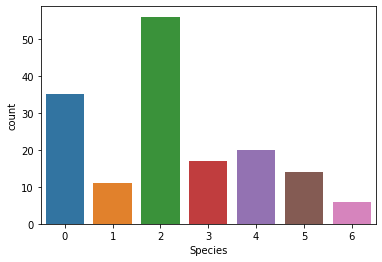

In [19]:
sns.countplot('Species',data=df)

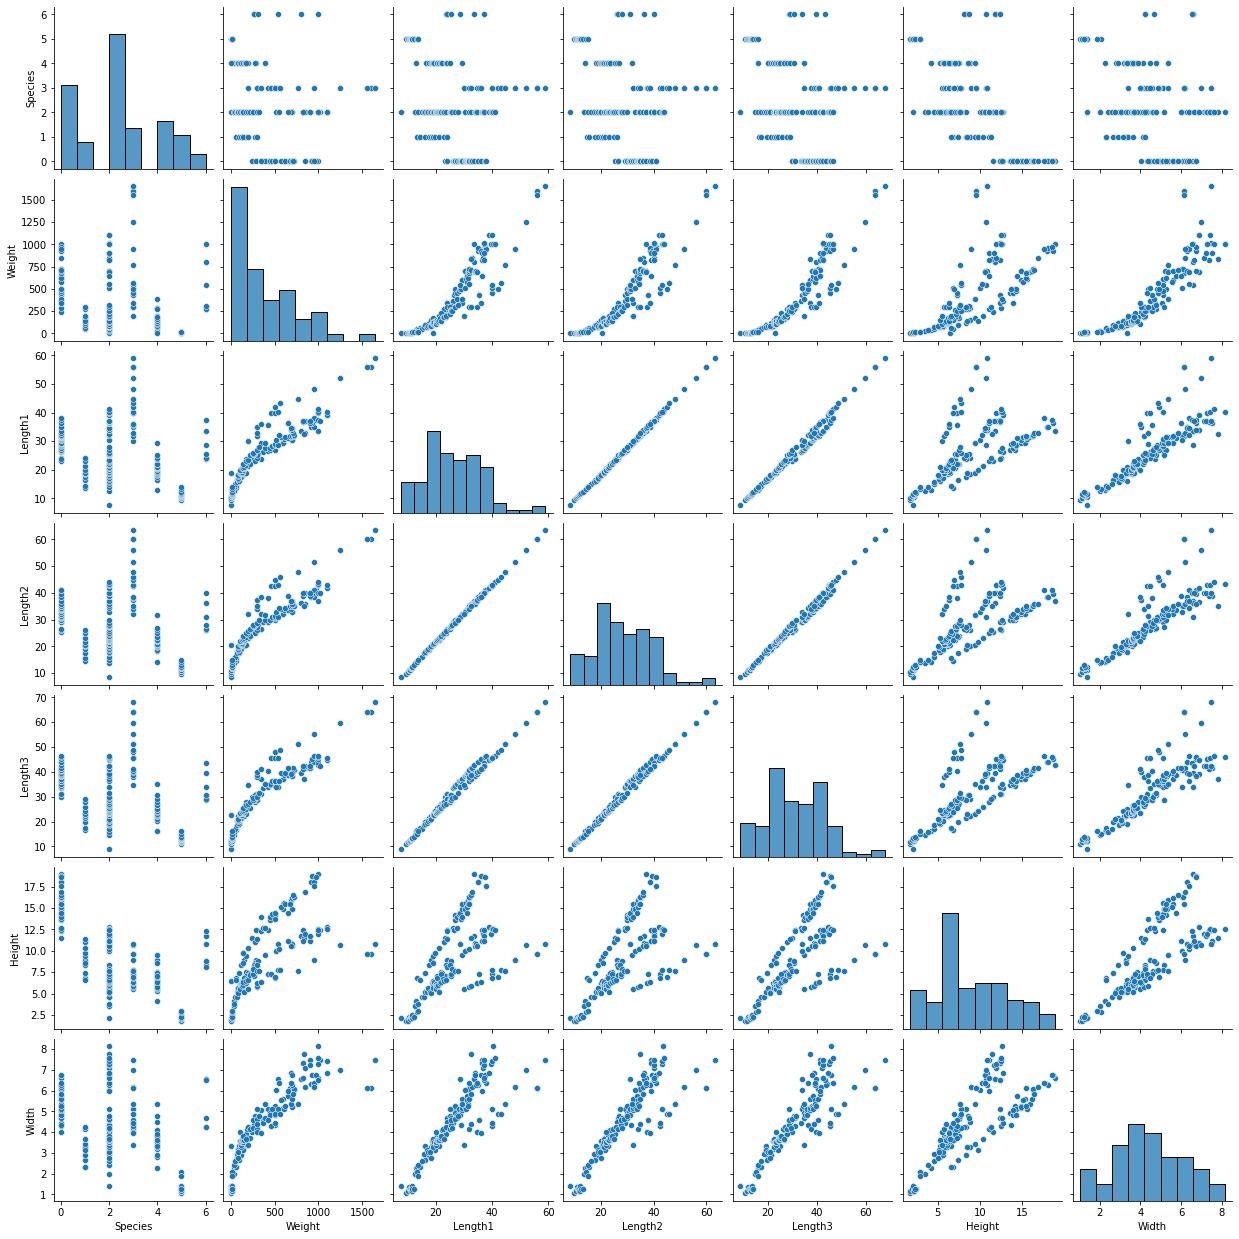

In [20]:
sns.pairplot(df)

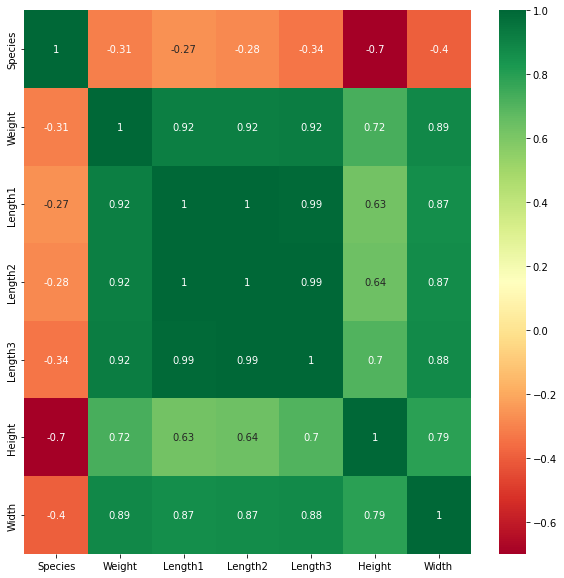

In [21]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(10,10))
ax = sns.heatmap(df[features].corr(), annot=True, cmap='RdYlGn')

## Train Test Split

In [22]:
y = df['Weight']
X = df.drop(["Weight"], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [24]:
X_train

,Species,Length1,Length2,Length3,Height,Width
75,2,15.0,16.2,17.2,4.5924,2.6316
138,3,43.2,46.0,48.7,7.7920,4.8700
2,0,23.9,26.5,31.1,12.3778,4.6961
86,2,20.0,22.0,23.5,6.1100,3.4075
45,4,20.5,22.5,25.3,7.0334,3.8203
...,...,...,...,...,...,...
71,1,24.0,26.0,29.0,11.3680,4.2340
106,2,25.9,28.0,29.4,7.8204,4.2042
14,0,29.4,32.0,37.2,14.9544,5.1708
92,2,20.5,22.5,24.0,6.7920,3.6240


In [25]:
print( X_train.shape, X_test.shape)

(127, 6) (32, 6)


In [26]:
y_train.shape

(127,)

## Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,Species,Length1,Length2,Length3,Height,Width
0,-0.153432,-1.130830,-1.148787,-1.220929,-1.062734,-1.104417
1,0.475143,1.709250,1.659079,1.536085,-0.259441,0.270423
2,-1.410580,-0.234492,-0.178283,-0.004342,0.891871,0.163613
3,-0.153432,-0.627269,-0.602290,-0.669526,-0.681725,-0.627854
4,1.103717,-0.576913,-0.555178,-0.511983,-0.449896,-0.374310
...,...,...,...,...,...,...
122,-0.782006,-0.224421,-0.225395,-0.188143,0.638351,-0.120212
123,-0.153432,-0.033068,-0.036948,-0.153133,-0.252311,-0.138516
124,-1.410580,0.319424,0.339947,0.529556,1.538754,0.455176
125,-0.153432,-0.576913,-0.555178,-0.625764,-0.510502,-0.494878


In [32]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test_scaled

,Species,Length1,Length2,Length3,Height,Width
0,-0.153432,-0.949548,-0.913228,-1.028376,-0.910391,-0.802350
1,1.732291,-1.463179,-1.506837,-1.544769,-1.605627,-1.941335
2,0.475143,0.379851,0.368214,0.319498,-0.817799,-0.647447
3,2.360865,-0.264706,-0.225395,-0.214400,-0.111717,-0.111859
4,-0.153432,-0.526557,-0.508066,-0.582002,-0.905545,-0.493650
5,-1.410580,0.732343,0.811066,1.002187,2.543648,1.334843
6,1.732291,-1.624319,-1.676440,-1.711065,-1.781771,-2.015408
7,1.103717,-0.264706,-0.300774,-0.284419,-0.436539,-0.321672
8,-0.153432,-0.365418,-0.357308,-0.433211,-0.525214,-0.162101
9,0.475143,2.595516,2.601316,2.498852,0.467203,1.569409


## Model Training and Evaluation

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from math import sqrt

model_1 = LinearRegression()
model_1.fit(X_train_scaled, y_train)
print("Training accuracy: ", model_1.score(X_train_scaled, y_train))

y_pred = model_1.predict(X_test_scaled)

MSE1 = mean_squared_error(y_test, y_pred)
print("Mean squared error:", MSE1)

RMSE1 = sqrt(MSE1)
print("Root mean squared error:",RMSE1)

R2_1 = r2_score(y_test, y_pred)
print("R2:", R2_1)

Training accuracy:  0.8898773659913863
Mean squared error: 13727.816553006516
R2: 0.9034878699241473


### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor

model_2 =  DecisionTreeRegressor()
model_2.fit(X_train_scaled, y_train)
print("Training accuracy:", model_2.score(X_train_scaled, y_train))

y_prediction = model_2.predict(X_test_scaled)

MSE2 = mean_squared_error(y_test, y_prediction)
print("Mean squared error:", MSE2)

RMSE2 = sqrt(MSE2)
print("Root mean squared error:",RMSE2)

R2_2 = r2_score(y_test, y_prediction)
print("R2:", R2_2)

SyntaxError: invalid syntax (4216782992.py, line 7)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor()
model_3.fit(X_train_scaled, y_train)
print("Training accuracy:", model_3.score(X_train_scaled, y_train))

y_predic = model_3.predict(X_test_scaled)

MSE3 = mean_squared_error(y_test, y_predic)
print("Mean squared error:", MSE3)

RMSE3 = sqrt(MSE3)
print("Root mean squared error:", RMSE3)

R2_3 = r2_score(y_test, y_predic)
print("R2:", R2_3)

## XGBoost

In [ ]:
import xgboost as xgb
model_4 = xgb.XGBRegressor()
model_4.fit(X_train_scaled, y_train)
print("Training accuracy:", model_4.score(X_train_scaled, y_train))

y_predict = model_4.predict(X_test_scaled)

MSE4 = mean_squared_error(y_test, y_predict)
print("Mean squared error:", MSE4)

RMSE4 = sqrt(MSE4)
print("Root mean squared error:", RMSE4)

R2_4 = r2_score(y_test, y_predict)
print("R2:", R2_4)